In [1]:
# Import functions for graphing and methods (also includes some libraries needed for data analysis)
from cross_val_funcs import *
from graphing_funcs import *
from method_funcs import *
from daymet_funcs import * 
from syn_gen_funcs import *

%matplotlib inline

# set style parameters for graphs
sns.set_style("darkgrid", {'axes.edgecolor': 'black'})
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams["legend.fontsize"] = 13
plt.rcParams['figure.dpi'] = 300

### Synthetic Data Generation

See `syn_gen_funcs.py` file for function used to create data (**sin14_method**).

[Link to paper for new algorithm](https://www.researchgate.net/publication/245383326_New_algorithm_for_generating_hourly_temperature_values_using_daily_maximum_minimum_and_average_values_from_climate_models)

In [2]:
s_num = 64
s_d = '2023-01-01'
e_d = '2023-12-31'

# Create pivot table for station
s_pivot, years = create_pivot(s_num)

# Split data (estimation and validation sets)
s_pivot_e = s_pivot.iloc[:years[-1], :] # pull all data from start year - one before latest
s_pivot_v = s_pivot.iloc[years[-1]:, :] # pull all data from latest - end

# Generate Sythetic Data
syn_data = create_daymet_daily(s_num, s_d, e_d)

# Generate Synthetic Data (Paper Method)
s14_piv = sin14_method(s_num, s_d, e_d)

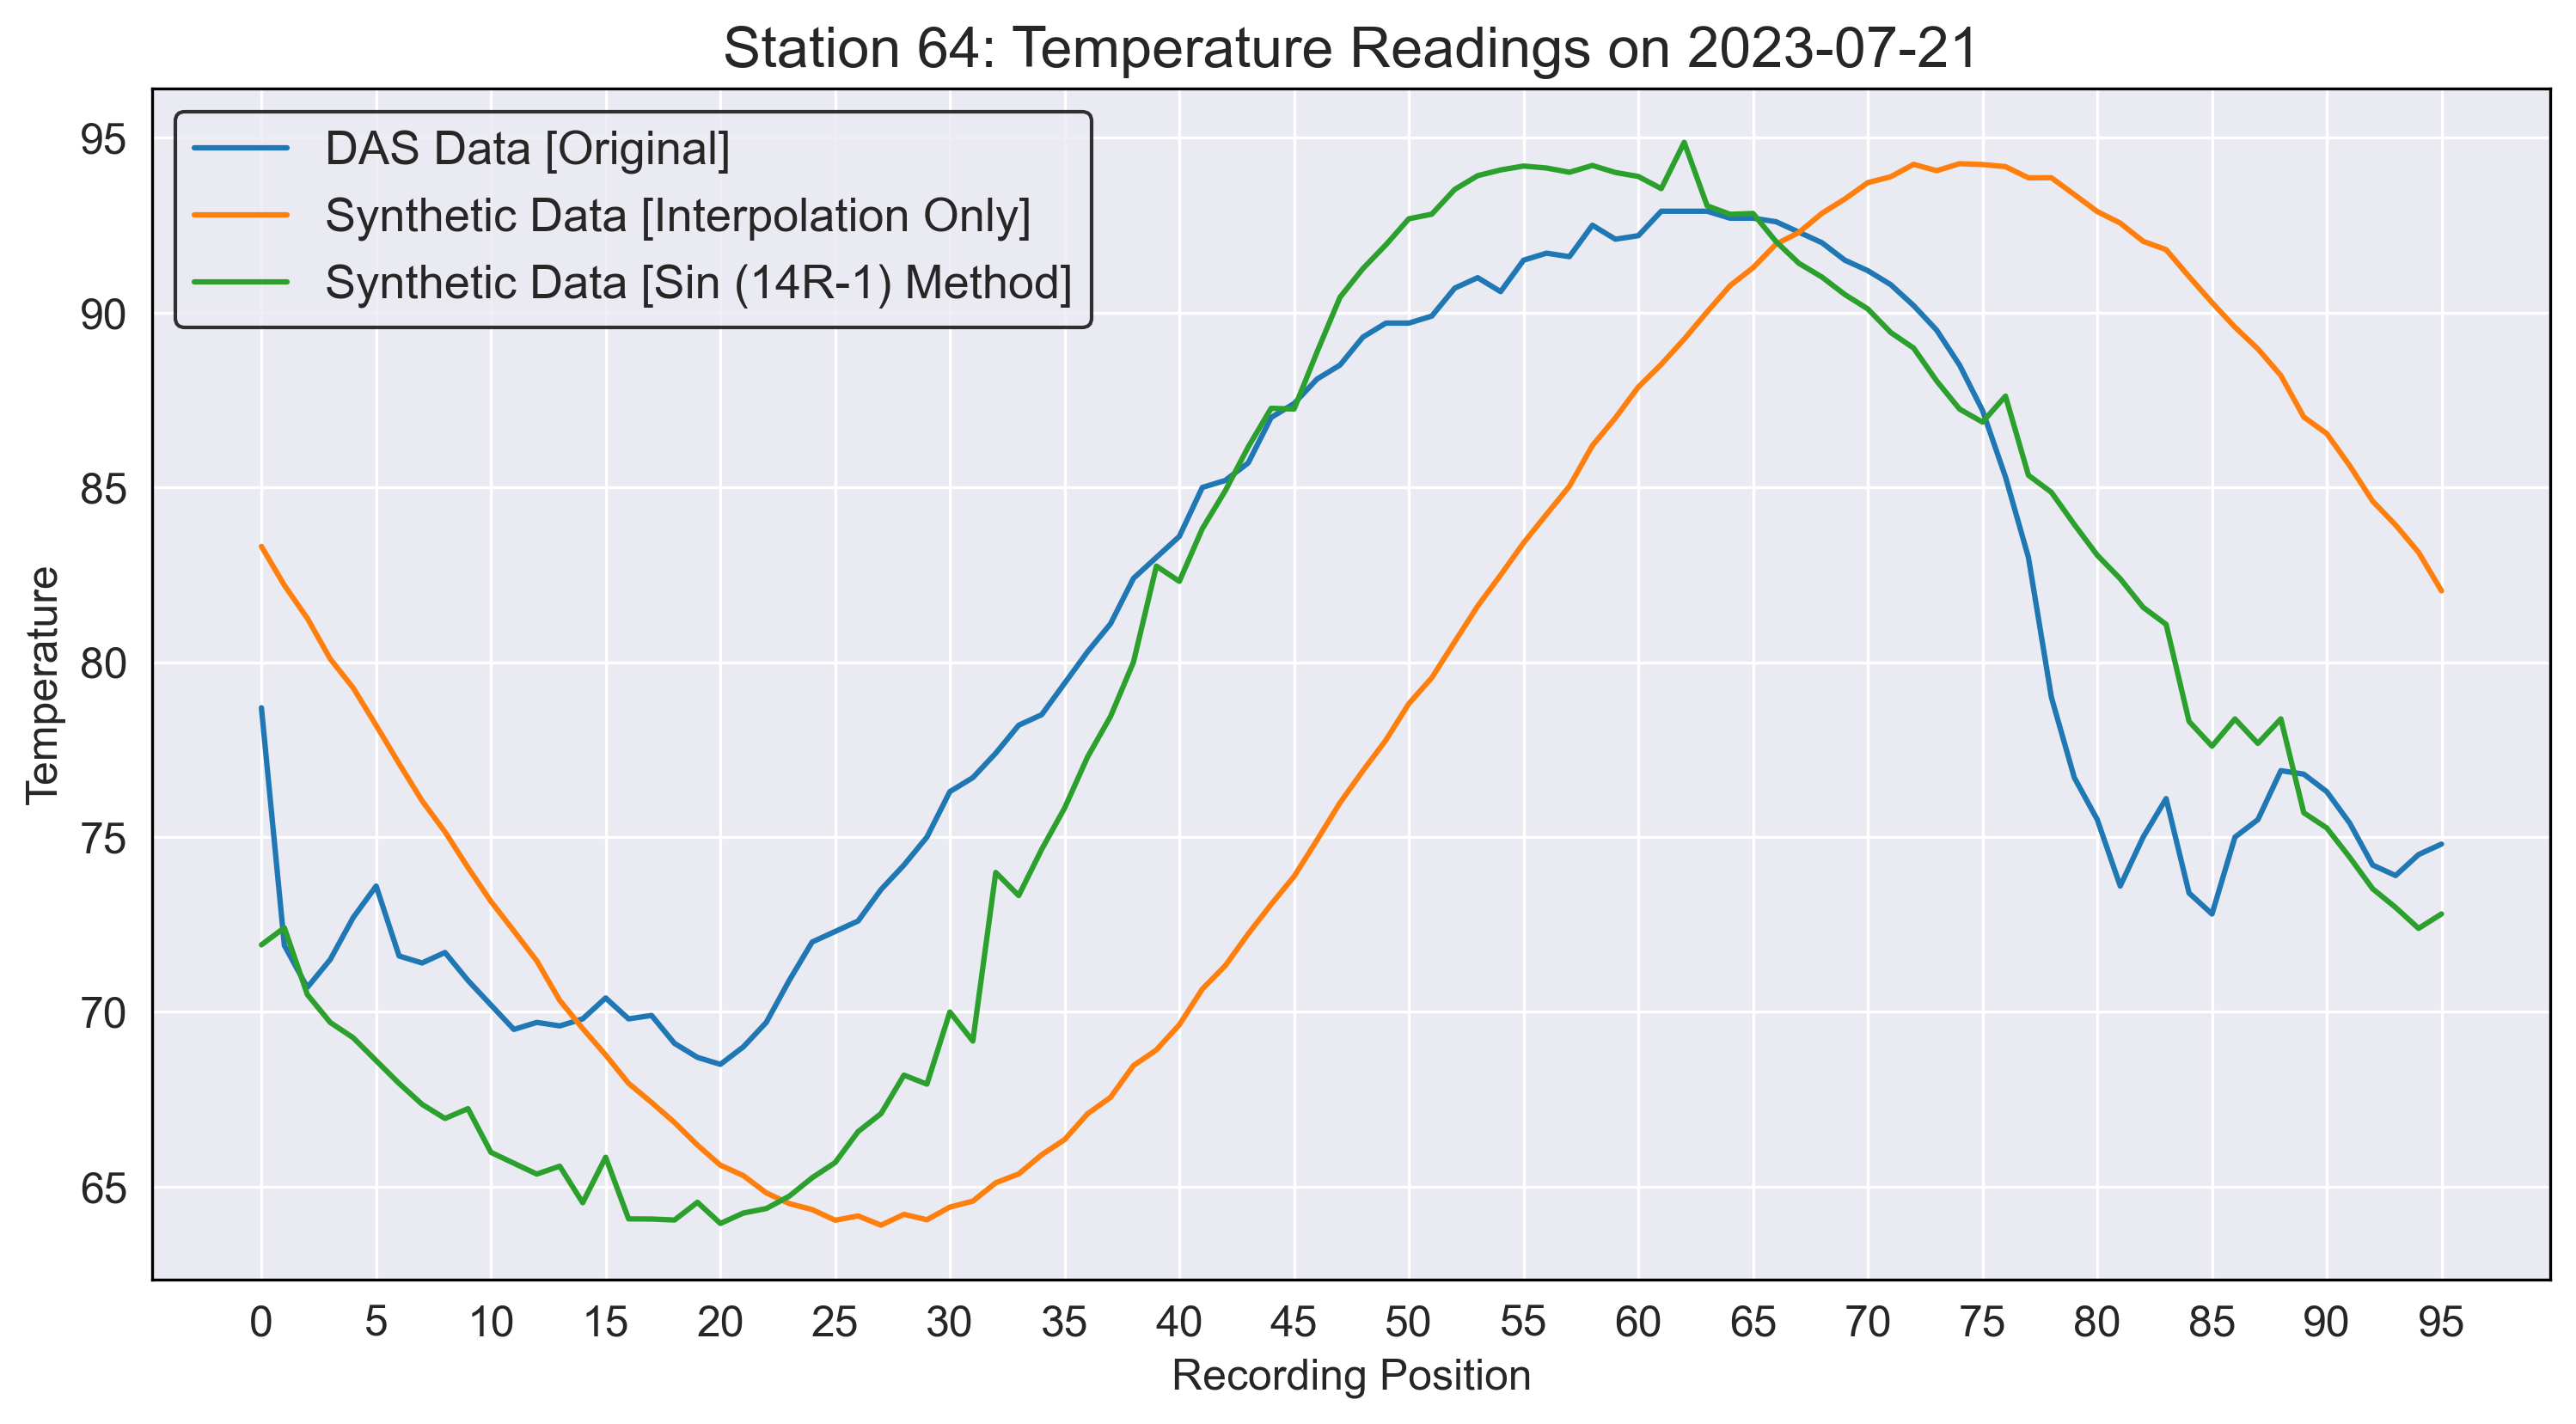

In [9]:
pos = 201

das_jan = s_pivot_v.iloc[pos].values # delta min/max [-4.7, 5.2]
syn_jan = syn_data.iloc[pos].values # delta min/max [-1.2, 1.4]
tmp_jan = s14_piv.iloc[pos].values # delta min/max [-2.8, 3.4]
date = list(s_pivot_v.iloc[pos:pos+1].index)[0]

plt.figure(figsize=(12,6))

plt.plot(das_jan, label='DAS Data [Original]')
plt.plot(syn_jan, label='Synthetic Data [Interpolation Only]')
plt.plot(tmp_jan, label='Synthetic Data [Sin (14R-1) Method]')
plt.legend()
plt.xticks(np.arange(0, 96, 5))
plt.title(f'Station {s_num}: Temperature Readings on {date}')
plt.ylabel('Temperature')
plt.xlabel('Recording Position')
plt.show()

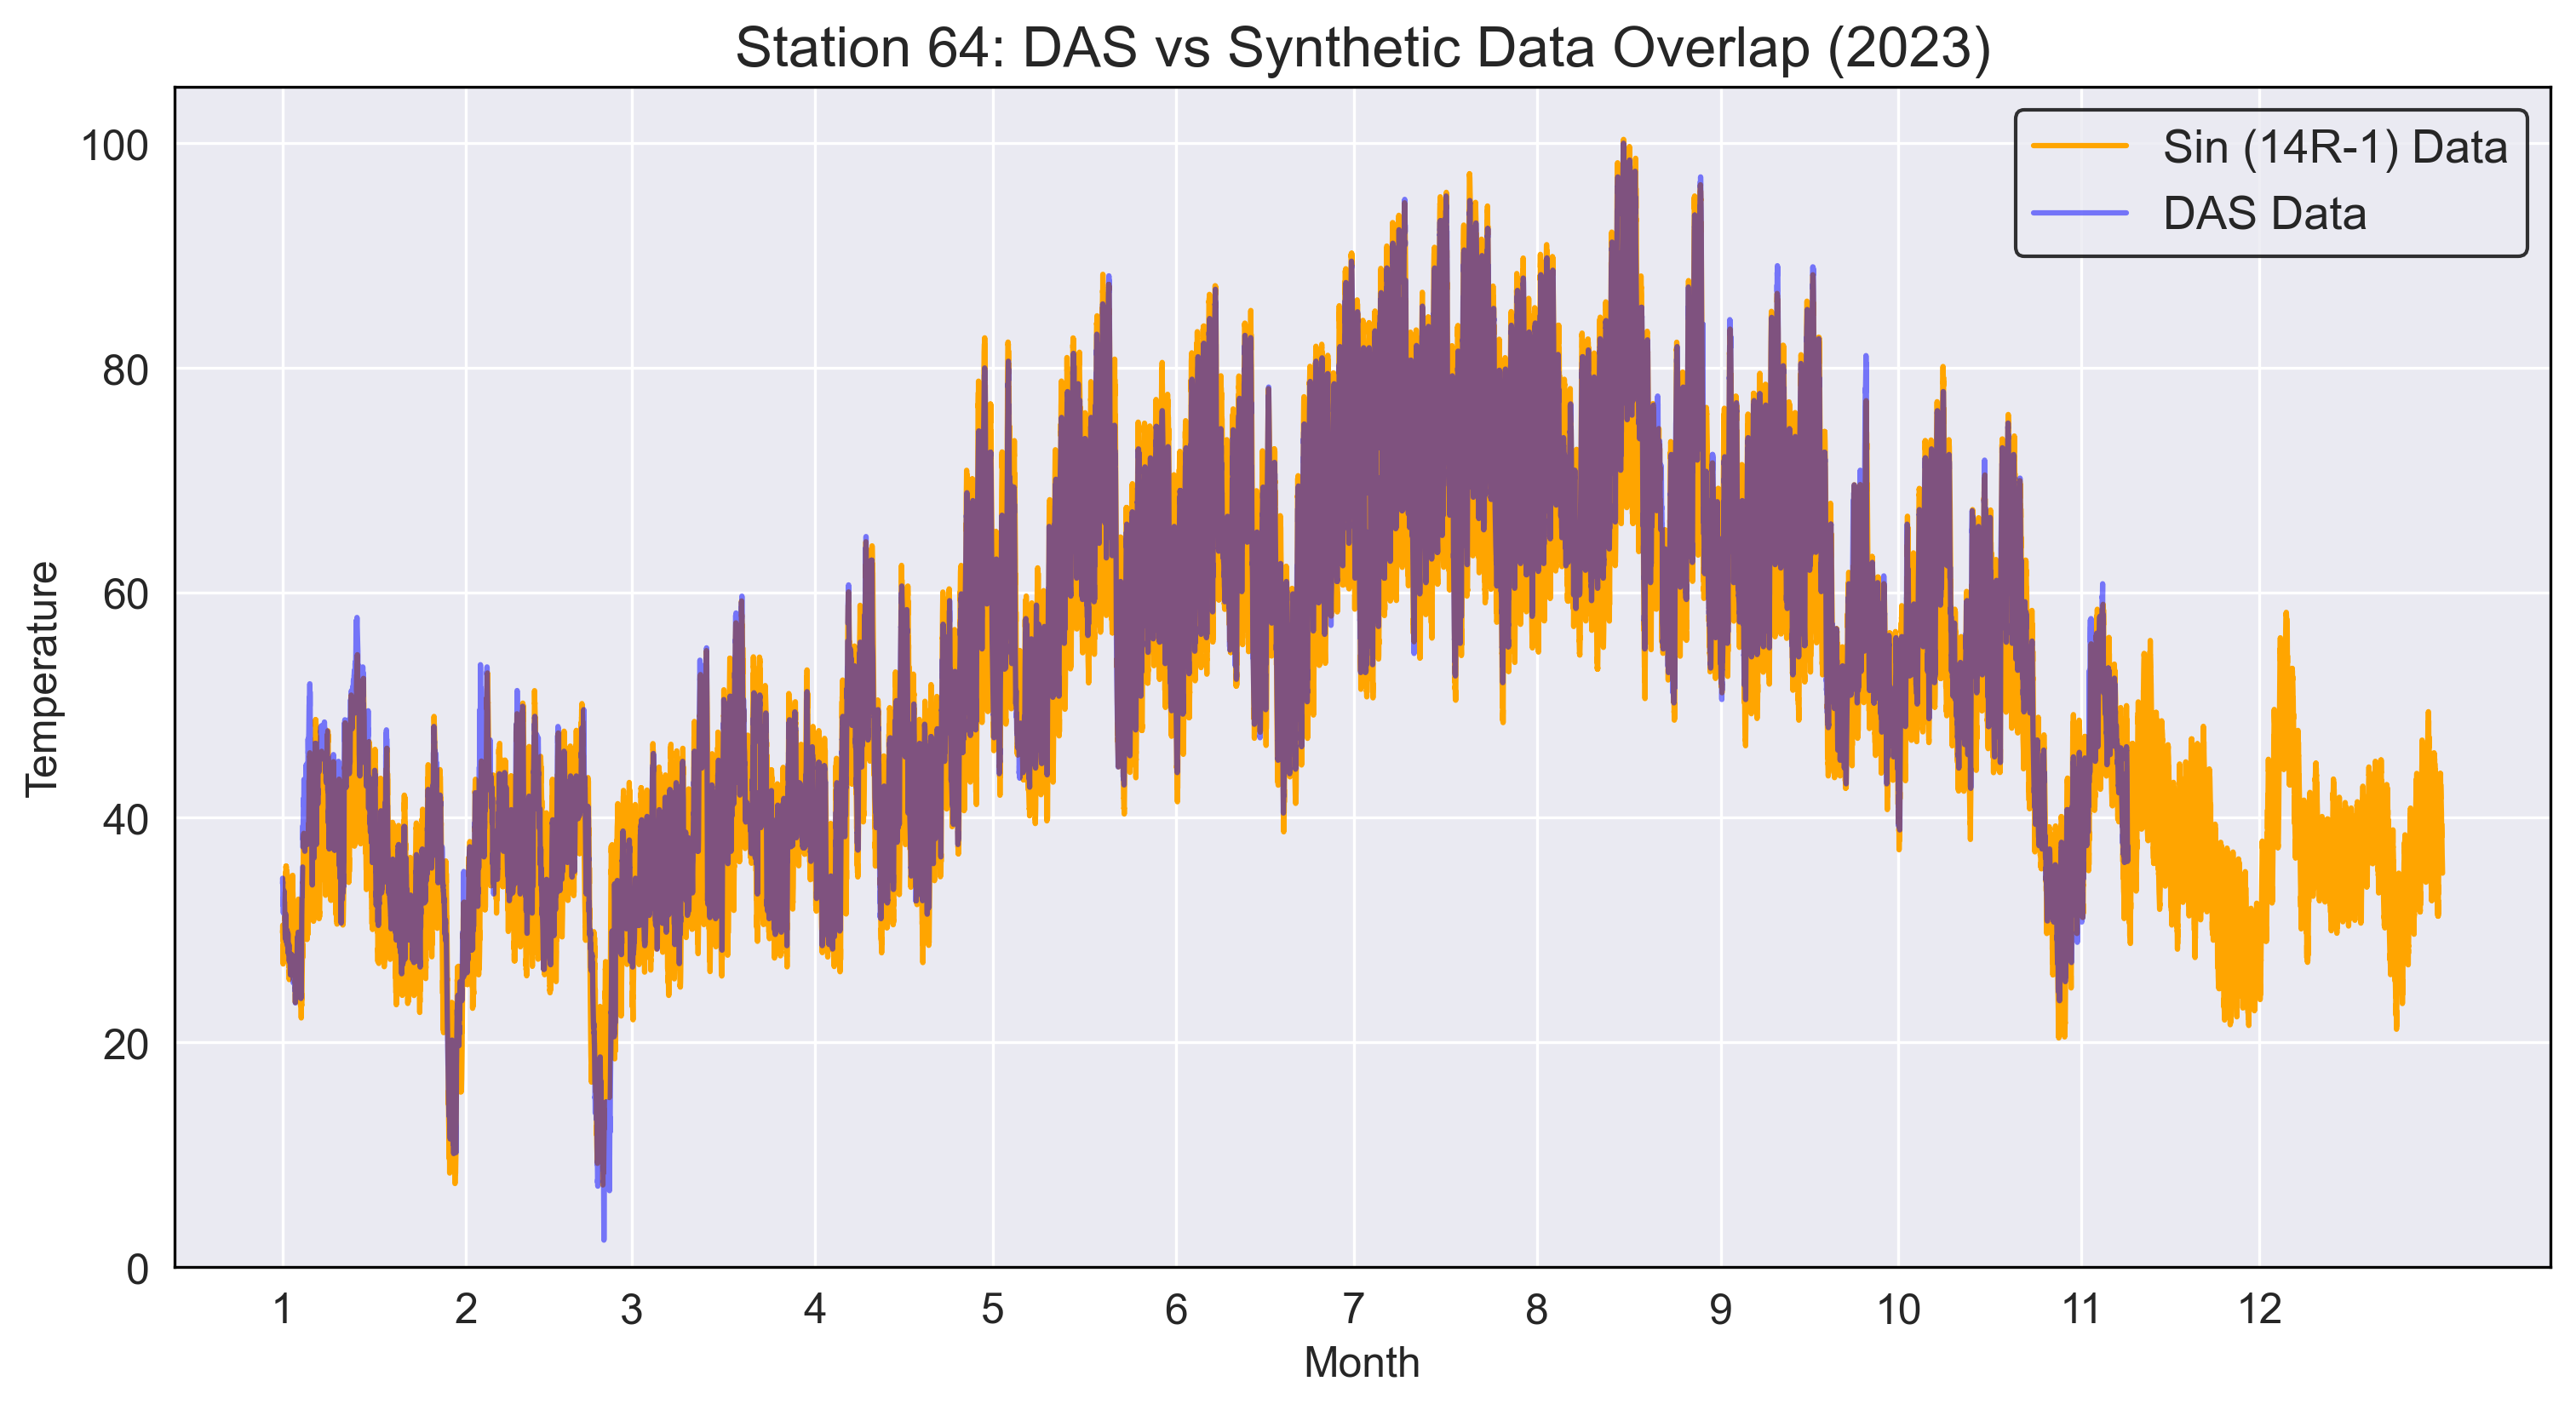

In [114]:
# Plot DAS and Daymet data to ensure they are similar
das_vals = s_pivot_v.values.flatten()
dm_vals = s14_piv.values.flatten()

# Find month index (used for plotting)
tmp = [int(x.split('-')[1]) for x in syn_data.index.values] # get month from index
m_idx = [x*len(syn_data.columns.tolist()) for x in range(1,len(tmp)) if tmp[x] != tmp[x-1]] # month change idx
m_idx.insert(0, 0) # insert start date
m_idx.append(len(syn_data.values.flatten())) # insert end date

plt.figure(figsize=(12,6))
plt.plot(dm_vals, color='orange', label='Sin (14R-1) Data')
plt.plot(das_vals, color='blue', label='DAS Data', alpha=0.5)

plt.ylim(0, 105)

plt.ylabel('Temperature')
plt.xlabel('Month')
plt.title(f'Station {s_num}: DAS vs Synthetic Data Overlap (2023)')
plt.xticks(m_idx[:-1], range(1,len(m_idx)))
plt.grid(True)
plt.legend()
plt.show()